# Welcome to **Qubit Quest** 🧙‍♂️

Embark on a journey through the quantum realm!  


In this adventure, you will:
- Discover the secrets of **qubits**  
- Forge mighty tools like the **oracle** and the **diffusion spell**  
- Harness **Grover’s algorithm** to reveal the hidden state  

Complete each quest to level up your *Quantum Mastery*!  

😼 Schrödinger’s Cat will be watching...  
🚀 Let the quest begin!


# ⚔️ Challenge 1: Bits vs Qubits

---

## Classical Bits
All modern computers - laptops, smartphones, supercomputers- are built on the concept of the **bit**.  
- A **bit** is the smallest unit of information in classical computing.  
- A bit can take only one of two possible values:   $0 \space \text{or} \space 1$


Everything you see on a computer -text, images, videos- is ultimately encoded as long strings of `0`s and `1`s.  

---

## Enter Quantum Computing
Quantum computing introduces a **completely new paradigm** of computation, inspired by the principles of quantum mechanics.  
- Just like bits are the building blocks of classical computers,  
- **qubits (quantum bits)** are the building blocks of quantum computers.  

The key difference is that:  
- Classical bits are always either `0` or `1`.  
- Qubits can exist in a **superposition** of both `0` and `1`.  

This ability makes qubits **far more powerful**, enabling algorithms (like Grover’s, Shor’s, VQE) that are impossible or impractical on classical machines.  

---

## Ket Notation
In quantum mechanics and quantum computing, we use **bra-ket notation** (also called **Dirac notation**) to represent states.  

- A classical bit `0` is written as:  
$$
  |0⟩ = \begin{bmatrix} 1 \\ 0 \end{bmatrix}
$$

- A classical bit `1` is written as:  
$$
  |1⟩ = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

So even classical states can be expressed in ket notation.  

---

## Qubits in Ket Notation
A **qubit state** is written as:  
$$
|\psi⟩ = \alpha|0⟩ + \beta|1⟩
$$  
where:  
- $\alpha$ and $\beta$ are **complex numbers** (called probability amplitudes),  
- They satisfy the **normalization condition**:  
$$
|\alpha|^2 + |\beta|^2 = 1
$$  

Examples:  
- $|0⟩ = [1, 0]$ 

- $|1⟩ = [0, 1]$  

- $|+\rangle = \frac{1}{\sqrt{2}}[1, 1]$  (equal superposition of `0` and `1`)  

---

## Your Task
Write a function `identify_input(x)` that:  
1. Returns `"bit"` if the input is `0` or `1`.  
2. Returns `"qubit"` if the input is a 2-element vector $[\alpha, \beta]$ that satisfies $|\alpha|^2 + |\beta|^2 = 1$.  
3. Returns `"neither"` otherwise.  

---

## Starter Code

In [1]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer, AerSimulator
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram,plot_state_city
from qiskit.quantum_info import Statevector
import numpy as np
import math
from AutoGrader import grade
from Grader2 import grade2


In [2]:

def identify_input(x):
    """
    Identifies whether the input is a classical bit, a qubit, or neither.

    Parameters
    ----------
    x : any
        The input value to classify. Can be an integer, list, tuple, or other type.

    Returns
    -------
    str
        One of:
        - "bit" if x is a classical bit (0 or 1).
        - "qubit" if x is a valid normalized 2D quantum state vector
        - "neither" if x does not match either category.
    """
    ### YOUR CODE HERE
    if x in [0, 1]:
        return "bit"
    
    # Case 2: Qubit state
    if isinstance(x, (list, tuple)) and len(x) == 2:
        alpha, beta = x
        norm = abs(alpha)**2 + abs(beta)**2
        if math.isclose(norm, 1.0, rel_tol=1e-9):
            return "qubit"
    
    # Case 3: Neither
    return "neither"


In [ ]:
## Run Grader
import Grader2
from importlib import reload

reload(Grader2)
Grader2.grade2(identify_input,1)


--- Running Tests for Question 1 ---
✅ Test 1 passed
✅ Test 2 passed
✅ Test 3 passed
✅ Test 4 passed
✅ Test 5 passed
✅ Test 6 passed
✅ Test 7 passed
✅ Test 8 passed
✅ Test 9 passed
✅ Test 10 passed

Summary: {'tests_passed': 10, 'total': 10}

Congratulations🎉!! You have passed all given tests.


## Teaser for Next Question

We saw that qubits can represent superpositions like $|+\rangle = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$

In the next challenge, we’ll learn how to create superposition states using quantum gates in Qiskit.

## ⚔️ Challenge 2: Entering the Realm of Superposition

### From Classical to Quantum
In **classical computing**, the fundamental unit of information is the **bit**. A bit can only exist in one of two states:  

$$ |0 \rangle \space \text{or} \space |1\rangle $$

For example, a coin is either **heads** or **tails** at a given time.  

In **quantum computing**, the fundamental unit of information is the **qubit**. A qubit can exist not only in $|0\rangle$ or $|1\rangle$, but also in a **superposition** of both:
$$
|\psi\rangle = \alpha \, |0\rangle + \beta \, |1\rangle
$$
 

where $\alpha, \beta \in \mathbb{C}$ and must satisfy the normalization condition:  

$$
|\alpha|^2 + |\beta|^2 = 1 
$$  

This is **not the same as classical probability**:  
- In classical probability, you have uncertainty about whether a system is in state $0$ or $1$.  
- In quantum mechanics, the qubit is **truly in both states at once** until it is measured. Measurement collapses it probabilistically into $0$ or $1$.  


---
### The Hadamard Gate
The **Hadamard gate** ($H$) is one of the most important quantum gates.  
It creates a balanced superposition from a definite state. Its matrix is:

$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

When $H$ acts on $|0\rangle$:  

$$
H|0\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
$$

When $H$ acts on $|1\rangle$:  

$$
H|1\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
$$

And applying $H$ **twice** brings the qubit back:  

$$
H(H|0\rangle) = |0\rangle
$$

This operation has **no classical equivalent**.  
In the classical world, there is no operation that can take a definite bit ($0$ or $1$) into an **equal mixture of both possibilities** and then restore it back perfectly.  

---

### A Gentle Intro to Qiskit
Now that we know the theory, let’s try this on an actual **quantum simulator** using [Qiskit](https://quantum.cloud.ibm.com/docs/en/api/qiskit/index).

Qiskit is an **open-source quantum computing framework** developed by IBM. It provides the tools needed to design quantum circuits, run them on simulators, and even execute them on real quantum hardware made available through the IBM Quantum Experience. Just like Python libraries such as NumPy or TensorFlow make it easier to do mathematics or machine learning, Qiskit makes it easier to explore and experiment with quantum computation.

At its core, Qiskit allows you to **construct quantum circuits**: diagrams that describe the sequence of operations (quantum gates) applied to qubits. You can think of a quantum circuit as the "program" for a quantum computer. Qiskit then takes care of translating this abstract program into instructions that can be executed on different backends, whether they are high-performance simulators or actual quantum chips.

A powerful feature of Qiskit is that it seamlessly bridges the gap between **theory and practice**. For example, you can start by simulating small circuits on your laptop to verify theoretical ideas like superposition and entanglement. Then, with only minor changes to your code, you can submit the exact same circuits to run on a real IBM quantum processor over the cloud. This allows learners and researchers to experiment with genuine quantum hardware early on, making Qiskit not just a simulator, but a gateway to hands-on quantum computing.


Qiskit is an open-source framework for quantum computing.  
It allows us to:  
- **Build quantum circuits** (add qubits, classical bits, and gates)  
- **Visualize circuits**  
- **Run circuits** on simulators and real IBM quantum devices  

#### ✨ Basic Qiskit Usage


1. **Create a circuit with 1 qubit and 1 classical bit**:

In [4]:
qc = QuantumCircuit(1, 1)

2. **Add gates (e.g., Hadamard gate $H$)**:

In [5]:
qc.h(0)   # apply H gate on qubit 0

3. **Visualize circuit**:

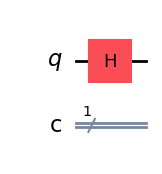

In [6]:
qc.draw('mpl')

## **Your Task**: Verify the Magic of $H$

### **Double Hadamard Test** 
- Start with a qubit in the state $|0\rangle$.
- Apply two consecutive Hadamard gates.  
- Measure the qubit many times.  
- Plot your results

**Expected Behavior**
- The results should be **always 0** (or very close to that).  
- This shows that applying Hadamard twice is equivalent to the **identity operation**:  
  $$
  H \cdot H = I
  $$  





In [7]:
simulator = AerSimulator(method='statevector')
# Helper function to run a circuit and get 0/1 counts
def run_circuit(circ, shots=1000):
    """
    Transpile and run a given quantum circuit on the qasm_simulator.

    Args:
        circ (QuantumCircuit): The quantum circuit to run.
        shots (int, optional): Number of times to sample the circuit. Default is 1000.

    Returns:
        dict: Measurement counts (e.g., {'0': 512, '1': 488})
    """
    transpiled = transpile(circ, simulator)
    job = simulator.run(transpiled, shots=shots)
    result = job.result()
    return result.get_counts()

In [8]:
def double_hadamard(shots):
    """
    Run a circuit with two consecutive Hadamards applied to |0⟩.

    Steps:
        1. Initialize |0⟩.
        2. Apply H gate twice.
        3. Measure over many shots.
        4. Plot your results(Optional)

    Expectation:
        Nearly all outcomes should be 0, since H^2 = I (identity).

    Args:
        shots (int): Number of measurement shots to simulate.

    Returns:
        dict: Counts of measurement outcomes {'0': int, '1': int}.
    """
    ### YOUR CODE HERE
    qc=QuantumCircuit(1,1)
    qc.h(0)
    qc.h(0)
    qc.measure(0,0)
    res=run_circuit(qc,shots=shots)
    return res



In [9]:
## Run Grader

import Grader2
from importlib import reload

reload(Grader2)
Grader2.grade2(double_hadamard,2)


--- Running Tests for Question 2 ---
✅ Test 1 passed
✅ Test 2 passed
✅ Test 3 passed
✅ Test 4 passed

Summary: {'tests_passed': 4, 'total': 4}

Congratulations🎉!! You have passed all given tests.


## Extension: Other Important Single-Qubit Gates  

So far, we’ve explored the **Hadamard gate ($H$)** and how it creates superpositions.  
Now let’s look at two more essential single-qubit gates:  

---

### The Pauli-X Gate $(X)$  
The $X$ gate is also called the **quantum NOT gate** because it flips the state of a qubit, just like a classical NOT gate flips a bit.  

In matrix form:  
$$
X =
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$  

- $X|0\rangle = |1\rangle$  
- $X|1\rangle = |0\rangle$  

So it swaps the computational basis states.  

---

### The Pauli-Z Gate $(Z)$  
The $Z$ gate leaves $|0\rangle$ unchanged but flips the **phase** of $|1\rangle$.  

In matrix form:  
$$
Z =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$  

- $Z|0\rangle = |0\rangle$  
- $Z|1\rangle = -|1\rangle$  

This doesn’t change the probability of measuring $|1\rangle$, but it introduces a **relative phase**, which becomes important in interference.  

---

### Mini-Challenge (Unmarked)
1. Create a 1-qubit circuit in Qiskit initialized to $|0\rangle$.  
2. Apply:  
   - An $X$ gate and observe the output.  
   - A $Z$ gate and observe the output.  
   - Combine $H$ and $Z$ (i.e., $H \rightarrow Z \rightarrow H$) and see what happens!  
3. Use the `Statevector` simulator to confirm your results.  

 *Hint: $qc.x(0)$ applies an $X$ gate to qubit 0, and $qc.z(0)$ applies a $Z$ gate.*  

---

 With $X$, $Z$, and $H$ under your belt, you now know the **basic toolkit of single-qubit gates**. These will become the building blocks for more complex states when we move to **two qubits** in the next question.


In [10]:
### YOUR CODE HERE (Optional Section)

## ⚔️ Challenge 3: From One Qubit to Many  

So far, we have looked at single qubits. But the real power of quantum computing comes when we scale up to **multiple qubits**. Just like classical bits can be grouped together to form larger registers (e.g., a 2-bit register can hold values $00, 01, 10, 11$), qubits can also be combined into **multi-qubit states**.  

### Two Classical Bits  
Classically, with **2 bits**, the possible states are:  
$$
00, \; 01, \; 10, \; 11
$$  
In ket notation, these can be written as:  
$$
|00\rangle, \; |01\rangle, \; |10\rangle, \; |11\rangle
$$  

### Two Qubits  
For two qubits, we extend the idea. Each qubit can be in a superposition, and together they span a **4-dimensional vector space**.  
A general two-qubit state looks like:  
$$
|\psi\rangle = \alpha_{00}|00\rangle + \alpha_{01}|01\rangle + \alpha_{10}|10\rangle + \alpha_{11}|11\rangle
$$  
where the coefficients $\alpha_{ij}$ are complex numbers such that:  
$$
|\alpha_{00}|^2 + |\alpha_{01}|^2 + |\alpha_{10}|^2 + |\alpha_{11}|^2 = 1
$$  

### Two-Qubit Superposition  
Using **Hadamard gates**, we can create equal superpositions. For example, starting with $|00\rangle$ and applying Hadamard ($H$) to **both qubits**, we get:  
$$
\frac{1}{2} ( |00\rangle + |01\rangle + |10\rangle + |11\rangle )
$$  
This is a state where all four possible outcomes appear with equal probability.  

### Adding Phases with Z Gates  
Quantum states are not just about probabilities — they also have **phases**. By applying $Z$ gates to individual qubits, we can flip the sign (phase) of certain terms. For example, applying a $Z$ on the second qubit changes $|01\rangle \mapsto -|01\rangle$ and $|11\rangle \mapsto -|11\rangle$. This way, we can construct interesting “equal superposition” states with phases.

---

### Your Task
1. Construct a 2-qubit quantum circuit in Qiskit starting from $|00\rangle$.  
2. Apply Hadamard gates to both qubits to create the equal superposition state.  
3. Now, add $Z$ gates on one or both qubits so that the resulting state is of the form $\ket{\psi} = \frac{1}{2}(\ket{00}-\ket{01}+\ket{10}-\ket{11})$.  
4. Print the circuit diagram and use the `Statevector` simulator in Qiskit to verify your state.  
5. Also plot the resulting state using a Qiskit visualization tool (e.g. `plot_state_city`).  

 *Hint: Use `from qiskit.quantum_info import Statevector` to inspect the final quantum state.*


In [11]:
def two_qubit_phase_superposition():
    """
    Constructs a 2-qubit quantum circuit that prepares the state:

    |ψ> = (1/2)(|00> - |01> + |10> - |11>)

    Steps:
    1. Start with |00>.
    2. Apply Hadamard gates to both qubits → equal superposition of 4 states.
    3. Apply Z gate on the last qubit → flips phase of states where qubit 1 = 1.

    Returns:
        qc (QuantumCircuit): The constructed circuit.
        state (Statevector): The resulting statevector.
    """
    qc=QuantumCircuit(2,1)
    qc.h([0, 1])
    qc.z(1)
    state = Statevector.from_instruction(qc)

    return qc, state

two_qubit_phase_superposition()

(<qiskit.circuit.quantumcircuit.QuantumCircuit at 0x14858166960>,
 Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
             dims=(2, 2)))

In [12]:
### Run Grader

import Grader2
from importlib import reload

reload(Grader2)
Grader2.grade2(two_qubit_phase_superposition,3)


--- Running Tests for Question 3 ---
✅ Test 1 passed
✅ Test 2 passed
✅ Test 3 passed
✅ Test 4 passed
✅ Test 5 passed
✅ Test 6 passed
✅ Test 7 passed

Summary: {'tests_passed': 7, 'total': 7}

Congratulations🎉!! You have passed all given tests.


## ⚔️ Challenge 4: Entanglement and the Bell State

We have seen how to create superpositions and apply single-qubit gates. Now let’s step into one of the most fascinating features of quantum mechanics: **entanglement**.  

---

### The CNOT Gate
The **Controlled-NOT (CNOT)** gate is a two-qubit gate with one qubit as the **control** and the other as the **target**.  

- If the control qubit is $|0\rangle$, the target qubit is unchanged.  
- If the control qubit is $|1\rangle$, the target qubit is flipped by an $X$ gate.  

In matrix form:  
$$
\text{CNOT} =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}
$$  

---

### Entanglement
A **two-qubit state** is called *entangled* if it cannot be written as the product of two single-qubit states.  

For example:  
- The state $|00\rangle$ is **not entangled**, because it is simply $|0\rangle \otimes |0\rangle$.  
- The state
  $$
  \frac{|00\rangle + |11\rangle}{\sqrt{2}}
  $$
  **is entangled**, because it cannot be decomposed into two independent single-qubit states.  

Such states are the heart of quantum mechanics — correlations exist between qubits that no classical system can reproduce.  

---

### The Bell State
The most famous entangled state is the **Bell state** (also called the EPR pair):  

$$
|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$  

This is created by:  
1. Applying a Hadamard ($H$) gate on the first qubit (puts it in superposition).  
2. Applying a CNOT gate with the first qubit as **control** and the second qubit as **target**.  

---

### Your task:  
1. Construct a 2-qubit circuit in Qiskit.  
2. Apply the gates needed to prepare the Bell state $|\Phi^+\rangle$.  
3. Use the `Statevector` simulator to confirm that the final state is:  
   $$
   \frac{|00\rangle + |11\rangle}{\sqrt{2}}
   $$  
4. Measure the qubits and observe that the outputs are always correlated (either `00` or `11`, never `01` or `10`).  

 *Hint: Use `qc.cx(a, b)` to apply a CNOT with qubit a as control and qubit b as target.*


In [13]:

def build_bell_state():
    """
    Construct a 2-qubit quantum circuit that prepares the Bell state |Φ+⟩.

    The Bell state is defined as:
        |Φ+⟩ = (|00⟩ + |11⟩) / √2

    Returns:
        QuantumCircuit: A 2-qubit circuit that prepares |Φ+⟩ when run.
    """
    ### YOUR CODE HERE
    qc = QuantumCircuit(2)
    qc.h(0)          # Hadamard on qubit 0
    qc.cx(0, 1)      # CNOT with qubit 0 as control and qubit 1 as target
    return qc

def verify_statevector(qc):
    """
    Verify the statevector of the given circuit against |Φ+⟩.

    Args:
        qc (QuantumCircuit): The circuit that should prepare the Bell state.

    Returns:
        bool: True if the statevector matches |Φ+⟩ (up to global phase).
    """
    ### YOUR CODE HERE
    state = Statevector.from_instruction(qc)
    # Expected statevector for |Φ+⟩
    expected = (1/np.sqrt(2)) * np.array([1, 0, 0, 1])
    return state.equiv(Statevector(expected))

    #####################

def simulate_measurements(qc,shots=100):
    """
    Simulate measurement outcomes of the given circuit.

    Args:
        qc (QuantumCircuit): Quantum circuit to simulate.
        shots (int): Number of repetitions.

    Returns:
        dict: Measurement counts (e.g., {"00": ~500, "11": ~500}).
    """
    ### YOUR CODE HERE
    sim = AerSimulator()
    circ = qc.copy()
    circ.measure_all()
    result = sim.run(circ, shots=shots).result()
    return result.get_counts()

    #######################

# --- Run the steps ---

# Step 1: Build circuit
qc = build_bell_state()
print(qc)

# Step 2: Verify statevector
assert verify_statevector(qc),  "Statevector does not match |Φ+⟩"
print("✅ Statevector matches |Φ+⟩")

# Visualize the state
state = Statevector.from_instruction(qc)
plot_state_city(state)
plt.show()

# Step 3: Simulate measurements
counts = simulate_measurements(qc)
print("Measurement outcomes:", counts)
plot_histogram(counts)
plt.show()

# Step 4: Test measurement correlation
assert set(counts.keys()) <= {"00", "11"}, "❌ Found unexpected outcomes!"
print("✅ Measurement outcomes are only correlated pairs (00, 11)")

assert set(counts.keys()) <= {"00", "11"}, "❌ Found unexpected outcomes!"
print("✅ Measurement outcomes are only correlated pairs (00, 11)")


     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
✅ Statevector matches |Φ+⟩
Measurement outcomes: {'11': 44, '00': 56}
✅ Measurement outcomes are only correlated pairs (00, 11)
✅ Measurement outcomes are only correlated pairs (00, 11)


In [14]:
## Run Grader

import Grader2
from importlib import reload

reload(Grader2)
Grader2.grade2(identify_input,1)


--- Running Tests for Question 1 ---
✅ Test 1 passed
✅ Test 2 passed
✅ Test 3 passed
✅ Test 4 passed
✅ Test 5 passed
✅ Test 6 passed
✅ Test 7 passed
✅ Test 8 passed
✅ Test 9 passed
✅ Test 10 passed

Summary: {'tests_passed': 10, 'total': 10}

Congratulations🎉!! You have passed all given tests.


# ⚔️ Challenge 5: Superpositions as Inputs — Talking to Many Worlds at Once  

So far, you’ve prepared individual qubits and even entangled pairs. But what if you could query a function **on all possible inputs at once**?  

That’s the magic of **superposition**. A single qubit can represent both $|0\rangle$ and $|1\rangle$ at the same time, and multiple qubits can represent *all combinations* simultaneously.  

For example:  
- A single Hadamard on $|0\rangle$ gives:  
  $$
  |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
  $$  

- On two qubits:  
  $$
  H^{\otimes 2} |00\rangle = \tfrac{1}{2} (|00\rangle + |01\rangle + |10\rangle + |11\rangle)
  $$  

Now, instead of checking $f(0)$ and $f(1)$ separately, you can send in **both at once**. Later, oracles (Challenge 6) will let us exploit this trick.  


### **Task**: Create a Superposition State  
1. Prepare a **1-qubit superposition** state $|+\rangle$.  
2. Prepare a **2-qubit uniform superposition** over $\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$.  
3. Measure the results (1000 shots) and verify that all possible states appear with equal probability.  


In [15]:
def make_superposition(num_qubits=2):
    """
    Create a uniform superposition over all computational basis states 
    of a given number of qubits.

    Args:
        num_qubits (int): Number of qubits in the register.

    Returns:
        QuantumCircuit: A circuit that initializes |0...0> 
                        and applies Hadamards to create the superposition:
                        H^{⊗ num_qubits} |0...0>.
    """
    ### YOUR CODE HERE
    qc=QuantumCircuit(num_qubits)
    qc.h(range(num_qubits))
    return qc
make_superposition()


In [16]:
## Run Grader
import Grader2
from importlib import reload

reload(Grader2)
Grader2.grade2(make_superposition,5)


--- Running Tests for Question 5 ---
✅ Test 1 passed
✅ Test 2 passed
✅ Test 3 passed
✅ Test 4 passed
✅ Test 5 passed
✅ Test 6 passed
✅ Test 7 passed

Summary: {'tests_passed': 7, 'total': 7}

Congratulations🎉!! You have passed all given tests.


# ⚔️Challenge 6: Oracles — The Black Boxes of Quantum Algorithms  

## Classical Oracles  
In classical computing, an **oracle** is like a “black box” function. You can give it an input $x$, and it returns an output $f(x)$. But the key idea is: you are **not allowed to look inside the oracle**. You only learn about $f$ through queries.  

For example, imagine you have a function $f:\{0,1\} \to \{0,1\}$:  
- If $f(0) = 1$, the oracle will tell you when you ask about input $0$.  
- If $f(1) = 0$, it will also tell you when you ask about input $1$.  

You have to figure out properties of $f$ only by querying it.  

---

## Quantum Oracles  
Quantum algorithms also use oracles, but now the input can be in **superposition**, and the oracle must act **reversibly**. This makes things much more powerful.  

There are two standard types of quantum oracles:  

1. **Bit-flip oracle (standard form):**  
   This oracle takes an input state $|x\rangle|y\rangle$ and maps it to:  

   $$
   |x\rangle|y \oplus f(x)\rangle
   $$  

   where $\oplus$ is addition modulo 2.  
   - Here, $x$ is the input, $y$ is an auxiliary qubit (workspace), and $f(x)$ is the hidden function.  

2. **Phase oracle (phase kickback form):**  
   This oracle acts only on the input qubit:  

   $$
   |x\rangle \mapsto (-1)^{f(x)} |x\rangle
   $$  

   - Instead of writing the result to an auxiliary qubit, it encodes the answer as a **phase** on $|x\rangle$.  
   - This form is especially important in algorithms like Grover’s search and Deutsch–Jozsa.  

In both cases, the **inner working of $f$ is hidden** — you only know how the oracle transforms your state. Many quantum algorithms are measured by how many times they query such an oracle.  

---

## **Task 6a** — Implementing a Simple Phase Oracle  

Let’s start with the **phase oracle**. Suppose we define $f(x)$ such that:  

- $f(0) = 0$  
- $f(1) = 1$  

That means the oracle should map:  

$$
|0\rangle \mapsto |0\rangle, \space |1\rangle \mapsto -|1\rangle
$$  

In other words, it applies a phase of $-1$ to the $|1\rangle$ state.  

 This is exactly what the **$Z$ gate** does!  




### **Task 6a — Implementing and Testing a Phase Oracle**

We want to implement a **phase oracle** defined by the function $f(x)$:

- $f(0) = 0$  
- $f(1) = 1$  

This oracle acts on the computational basis states as:

$$
|0\rangle \mapsto |0\rangle, \quad |1\rangle \mapsto -|1\rangle
$$

In other words, it applies a phase of $-1$ to the $|1\rangle$ state.  
This is exactly the action of the **$Z$ gate**.  

---

#### **Mini Task:**

1. **Implement the oracle** as a single-qubit circuit in Qiskit using the $Z$ gate.  

2. **Verify its effect** by preparing the superposition state  

$$
|+\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
$$  

3. Apply the oracle to this state.  

4. Apply another Hadamard to map the relative phase back into the computational basis.  

5. **Measure the qubit** and compare the outcomes in two cases:  

   - **Without the oracle:**  

   $$
   H|+\rangle = |0\rangle
   $$  

   → Expect measurement result `0` with probability $1$.  

   - **With the oracle:**  

   $$
   HZ|+\rangle = |1\rangle
   $$  

   → Expect measurement result `1` with probability $1$.  

---

This experiment shows how a **phase change becomes observable** when combined with interference.


💡 *Hint: Try preparing $|0\rangle$ and $|1\rangle$ separately as inputs, run the oracle, and check the measurement outcomes. For a bonus, try applying it to a superposition state with a Hadamard and see the global effect.*  


In [17]:
def phase_oracle_demo(shots):
    """
    Demonstrate the effect of a simple single-qubit phase oracle.

    The oracle is defined by the function f(x):
        f(0) = 0   --> |0> remains unchanged
        f(1) = 1   --> |1> acquires a phase of -1

    This is equivalent to applying the Z gate.

    Steps:
        1. Prepare the |+> state = (|0> + |1>)/sqrt(2) using H on |0>.
        2. (Case A) Apply another Hadamard and measure (no oracle).
        3. (Case B) Apply Z (oracle), then Hadamard, and measure.
        4. Return measurement counts for both cases.

    Args:
        shots (int, optional): Number of shots to run in the simulator. Default = 1000.

    Returns:
        dict: {
            "without_oracle": counts from Case A,
            "with_oracle": counts from Case B
        }
    """
    sim = AerSimulator()

    # --- Case A: Without Oracle ---
    qc_no_oracle = QuantumCircuit(1, 1)
    qc_no_oracle.h(0)     # prepare |+>
    qc_no_oracle.h(0)     # second Hadamard
    qc_no_oracle.measure(0, 0)

    job0 = sim.run(transpile(qc_no_oracle, sim), shots=shots)
    counts_no_oracle = job0.result().get_counts()

    # --- Case B: With Oracle (Z gate) ---
    qc_with_oracle = QuantumCircuit(1, 1)
    qc_with_oracle.h(0)   # prepare |+>
    qc_with_oracle.z(0)   # apply oracle
    qc_with_oracle.h(0)   # second Hadamard
    qc_with_oracle.measure(0, 0)

    job1 = sim.run(transpile(qc_with_oracle, sim), shots=shots)
    counts_with_oracle = job1.result().get_counts()

    return {
        "without_oracle": counts_no_oracle,
        "with_oracle": counts_with_oracle
    }
phase_oracle_demo(1000)


{'without_oracle': {'0': 1000}, 'with_oracle': {'1': 1000}}

In [18]:
grade(phase_oracle_demo,6.1)

✅ Test 1 passed
✅ Test 2 passed
✅ Test 3 passed
✅ Test 4 passed
✅ Test 5 passed
✅ Test 6 passed
✅ Test 7 passed

Congratulations🎉!! You have passed all given tests.

Summary: {'tests_passed': 7, 'total': 7}


### Building a Non-Trivial 3-Bit Oracle

You’ve met oracles and built a simple 1-qubit phase oracle. Now construct a **3-input oracle** for a function that’s rich enough to require controlled logic (including negated controls).

##### The function $f(x_1,x_2,x_3)$
We’ll use a **2-to-1 multiplexer** (a classic digital primitive) expressed as a Boolean function:

$$
f(x_1,x_2,x_3) \;=\; (x_1 \land x_2) \;\oplus\; (\lnot x_1 \land x_3)
$$

Interpretation:  
- If $(x_1 = 1)$ then $f = x_2$  
- If $(x_1 = 0)$ then $f = x_3$

This requires both **positive** and **negated** controls and will push you to use multi-controlled logic (e.g., Toffoli) and basis changes with $X$.

#### Truth table

| $(x_1\space x_2\space x_3)$ | $f(x_1,x_2,x_3)$ |
|---|---|
| 000 | 0 |
| 001 | 1 |
| 010 | 0 |
| 011 | 1 |
| 100 | 0 |
| 101 | 0 |
| 110 | 1 |
| 111 | 1 |



## **Your tasks**

#### $A)$ Bit-flip oracle $(U_f)$

Implement the standard oracle
$$
U_f:\; |x_1 x_2 x_3\rangle|y\rangle \;\mapsto\; |x_1 x_2 x_3\rangle\,|y \oplus f(x_1,x_2,x_3)\rangle.
$$

**Requirements**

- Use a 3-qubit input register for $x_1, x_2, x_3$ and one target qubit $y$.  
- Gate set suggestion: $X, H, Z, \mathrm{CX}, \mathrm{CCX}$ (Toffoli).  
- For the $\lnot x_1$ control in $\lnot x_1 \land x_3$, use the **negated-control trick**: wrap the control with $X$ gates around the multi-control block.  

**Verification**

- For each of the 8 inputs $x$ with $y=0$, confirm that the measured $y$ equals $f(x)$.  
- Optionally, randomize $y$ and check that the mapping is $y \mapsto y \oplus f(x)$.  




#### $B)$ Phase oracle (phase-kickback form)

Convert your bit-flip oracle into a **phase oracle** that implements
$$
|x_1 x_2 x_3\rangle \;\mapsto\; (-1)^{f(x_1,x_2,x_3)}\,|x_1 x_2 x_3\rangle.
$$

**Two routes (pick one):**
1. **Kickback method:** Prepare the target qubit in $|-\rangle = (|0\rangle - |1\rangle)/\sqrt{2}$. Running your $U_f$ will imprint the phase $(-1)^{f(x)}$ on the input register.  
2. **Direct phase construction:** Replace each “write $f$ into $y$” subroutine by the corresponding **controlled-$Z$** or **multi-controlled-$Z$** actions on the input register. Use $H$ on a target line to swap between $X$ and $Z$ controls when needed, and $X$ wrappers to realize negated controls.

**Verification (statevector)**
- Prepare $|x\rangle$ basis states and check that amplitudes pick up a minus sign exactly when $f(x)=1$.  
- Bonus: Put the inputs into uniform superposition with $H^{\otimes 3}$, apply your phase oracle, and inspect the statevector phases.

---

### Practical hints (no full solution!)
- Realize $x_1 \land x_2$ with a **Toffoli** onto $y$.  
- Realize $\lnot x_1 \land x_3$ by wrapping the $x_1$ control with $X$ before and after the Toffoli that uses controls $(x_1,x_3)$ and target $y$.  
- Since $f$ is the **XOR** of these two terms, you can **add both into the same $y$** (each Toffoli flips $y$); the two flips implement the XOR.  
- For the **phase version**, initialize $y$ in $|-\rangle$ and reuse the same network, or translate each Toffoli-on-$y$ into a **controlled-phase** on the input lines.

---

### What to submit
- A Qiskit circuit for $U_f$ (bit-flip).  
- A Qiskit circuit (or wrapper) that realizes the **phase oracle**.  
- Brief logs or tables showing your verification on all 8 inputs (for bit-flip), and a statevector snapshot illustrating phases (for phase).

*Stretch goal:* Minimize your multi-controlled gate count or depth. Can you factor common controls or reuse work qubits efficiently?


In [19]:
def bit_flip_oracle():
    """
    Constructs a 3-bit multiplexer (2-to-1) bit-flip oracle U_f.

    Function implemented:
        f(x1,x2,x3) = (x1 AND x2) XOR (NOT x1 AND x3)

    Oracle action:
        |x1 x2 x3>|y> --> |x1 x2 x3>|y XOR f(x1,x2,x3)>

    Returns:
        QuantumCircuit: 4-qubit circuit implementing U_f.
                        Qubits [0,1,2] are input x1,x2,x3,
                        qubit [3] is target y.
    """
    qc = QuantumCircuit(4, name="U_f")
    
    # Toffoli for x1 AND x2 -> y
    qc.ccx(0, 1, 3)
    
    # Toffoli for NOT x1 AND x3 -> y
    qc.x(0)          # Wrap x1 to create negated control
    qc.ccx(0, 2, 3)
    qc.x(0)          # Undo X wrapper
    
    return qc


def phase_oracle():
    """
    Constructs a phase oracle for the 3-bit multiplexer function using phase kickback.

    Action:
        |x1 x2 x3> -> (-1)^(f(x1,x2,x3)) |x1 x2 x3>

    Implementation:
        - Prepares an auxiliary qubit y in the |-> state
        - Applies the bit-flip oracle to imprint phase onto the input qubits
        - Returns y to |0> (optional)

    Returns:
        QuantumCircuit: 4-qubit circuit implementing the phase oracle.
                        Qubits [0,1,2] are inputs x1,x2,x3,
                        qubit [3] is auxiliary target y.
    """
    qc = QuantumCircuit(4, name="PhaseOracle")
    
    # Prepare y in |-> state
    qc.x(3)
    qc.h(3)
    
    # Apply bit-flip oracle (U_f)
    qc.append(bit_flip_oracle(), [0, 1, 2, 3])
    
    # # Reset y to |0> 
    # qc.h(3)
    # qc.x(3)
    
    return qc
#qc=phase_oracle()
qc2=bit_flip_oracle()


In [20]:
import AutoGrader
from importlib import reload
reload(AutoGrader)
AutoGrader.grade(phase_oracle,6.2)

✅ Test 1 passed
✅ Test 2 passed
✅ Test 3 passed
✅ Test 4 passed
✅ Test 5 passed
✅ Test 6 passed
✅ Test 7 passed
✅ Test 8 passed

Congratulations🎉!! You have passed all given tests.

Summary: {'tests_passed': 8, 'total': 8}


## ⚔️ Challenge 7 — Grover’s Algorithm and the Diffusion Operator

We’ve seen oracles and phase oracles. Now let’s put them to use in one of the most famous quantum algorithms: **Grover’s search algorithm**.

---

### 1. The problem Grover solves
- You are given a “black box” oracle that marks one (or a few) “good” solutions among $N = 2^n$ possibilities.  
- Classically, finding the marked item takes on average $N/2$ queries.  
- Grover’s algorithm finds it in about $\sqrt{N}$ queries.

---

### 2. The idea (high-level)
Grover’s algorithm works by **amplitude amplification**:
- Start in a uniform superposition over all possible states.  
- Use the oracle to **reflect about the marked states** (flip their phase).  
- Use the **diffusion operator** to reflect about the average amplitude.  
- Repeating these two reflections gradually “rotates” the state vector toward the marked state(s).

You can imagine it like swinging a pendulum closer and closer to the target with each iteration.

---

### 3. Grover’s iteration step
Each iteration has two parts:

1. **Oracle reflection**:  
   Marks the target state(s) by flipping their sign (phase).  
   Think of it as “pointing them out.”

2. **Diffusion operator**:  
   Reflects the entire state around the **average amplitude**.  
   This boosts the probability of the marked states while reducing others.  

So, Grover’s iteration = **Oracle → Diffusion**.

---

### 4. The role of the diffusion operator
The diffusion operator is also called the **“inversion about the mean”** operator.  

- Suppose all amplitudes start equal.  
- The oracle flips one amplitude (makes it negative).  
- The diffusion step reflects all amplitudes around the **average value** — so the negative one becomes much larger (positive).  

**Geometric picture:**  
- Think of amplitudes as points on a line.  
- The average amplitude is the midpoint.  
- Diffusion is simply “flip each amplitude across that midpoint.”

This is why Grover’s algorithm works — each step increases the amplitude of the marked state, making it more likely to measure.

---

### 5. The diffusion operator as a circuit
Mathematically, for $n$ qubits, the diffusion operator is:

$$
D = 2|\psi\rangle\langle\psi| - I
$$

where $|\psi\rangle$ is the uniform superposition over all states.

In circuit form, we can implement $D$ using:
1. Hadamards to go from computational basis to uniform superposition.  
2. A phase flip of $|0\ldots 0\rangle$.  
3. Hadamards again to return to the original basis.

---

### 6. **Task** : Build the diffusion operator

Construct the diffusion operator for **3 qubits**.

**Requirements:**
- Start with 3 qubits (no ancilla needed).  
- Implement the “inversion about $|000\rangle$” trick:  
  - Apply $H^{\otimes 3}$.  
  - Apply an oracle that flips the phase of $|000\rangle$.  
  - Apply $H^{\otimes 3}$ again.  
- The phase flip on $|000\rangle$ can be built using multi-controlled gates (negated controls allowed).  

**Verification:**  
- Apply your operator to a simple state (e.g., uniform superposition).  
- Check that amplitudes transform as expected:  
  - $|000\rangle$ flips phase inside the sandwich.  
  - Final amplitudes should reflect “about the mean.”

---

### 7. Stretch goal
Generalize your diffusion operator circuit to $n$ qubits.  
(Hint: The same Hadamard–Phase–Hadamard trick works for any $n$.)

---


In [21]:
def phase_flip_zero(n_qubits):
    """
    Create a circuit that flips the phase of the |000...0> state.


    Args:
    num_qubits (int): Number of qubits in the circuit.


    Returns:
    QuantumCircuit: Circuit implementing phase flip on |000...0>.
    """
    qc = QuantumCircuit(n_qubits)

    # Flip |0> to |1> → so |000...0> maps to |111...1>
    qc.x(range(n_qubits))
    qc.barrier()

    # Multi-controlled Z on |111...1>
    if(n_qubits==1):
        qc.z(0)
    else:
        qc.h(n_qubits - 1)
        qc.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # controlled on all but last
        qc.h(n_qubits - 1)
    qc.barrier()
    # Undo the X gates
    qc.x(range(n_qubits))

    return qc

def diffusion_operator(n_qubits=3):# can implement for 3, n is optional
    """
    Construct the diffusion operator (Grover's diffusion / inversion-about-the-mean operator)
    for an n-qubit system.

    The operator is implemented as:
    H^{⊗n} → Phase flip on |000...0⟩ → H^{⊗n}

    Args:
    n_qubits (int): Number of qubits.

    Returns:
    QuantumCircuit: A circuit implementing the diffusion operator on n_qubits.
    """
    qc = QuantumCircuit(n_qubits)

    # Step 1: Apply H
    qc.h(range(n_qubits))

    # Step 2: Phase flip on |000...0>
    qc.append(phase_flip_zero(n_qubits), range(n_qubits))

    # Step 3: Apply H again
    qc.h(range(n_qubits))

    return qc
qc=diffusion_operator(2)
print(qc.decompose().draw())

     ┌────────────┐┌───┐ ░                 ░ ┌───┐┌────────────┐
q_0: ┤ U(π/2,0,π) ├┤ X ├─░────────■────────░─┤ X ├┤ U(π/2,0,π) ├
     ├────────────┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤├────────────┤
q_1: ┤ U(π/2,0,π) ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ U(π/2,0,π) ├
     └────────────┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└────────────┘


In [22]:
# Run Grader
import AutoGrader
from importlib import reload
reload(AutoGrader)
AutoGrader.grade(diffusion_operator,7)

✅ Test 1: Circuit type & qubits (n=1)
✅ Test 2: No measurement gates (n=1)
✅ Test 3: Circuit is unitary (n=1)
✅ Test 4: Uniform superposition invariance (n=1)
✅ Test 5: |0...0> amplitude (n=1)
✅ Test 6: |1...1> normalization (n=1)
✅ Test 7: Inversion-about-the-mean amplitudes (n=1)
✅ Test 8: Circuit type & qubits (n=2)
✅ Test 9: No measurement gates (n=2)
✅ Test 10: Circuit is unitary (n=2)
✅ Test 11: Uniform superposition invariance (n=2)
✅ Test 12: |0...0> amplitude (n=2)
✅ Test 13: |1...1> normalization (n=2)
✅ Test 14: Inversion-about-the-mean amplitudes (n=2)
✅ Test 15: Circuit type & qubits (n=3)
✅ Test 16: No measurement gates (n=3)
✅ Test 17: Circuit is unitary (n=3)
✅ Test 18: Uniform superposition invariance (n=3)
✅ Test 19: |0...0> amplitude (n=3)
✅ Test 20: |1...1> normalization (n=3)
✅ Test 21: Inversion-about-the-mean amplitudes (n=3)
✅ Test 22: Circuit type & qubits (n=4)
✅ Test 23: No measurement gates (n=4)
✅ Test 24: Circuit is unitary (n=4)
✅ Test 25: Uniform superpo

## ⚔️ Challenge 8 — The Reflection Operator

We now turn to the second key ingredient of Grover’s algorithm: the **reflection operator**.  
This operator works hand in hand with the diffusion operator to amplify the amplitudes of marked states.

---

### 1. What is the reflection operator?
The reflection operator is simply the **oracle operation** that flips the phase of the marked states.  

Formally, for a function $f : \{0,1\}^n \to \{0,1\}$, the reflection operator acts as:

$$
R_f |x\rangle = (-1)^{f(x)} |x\rangle
$$

- If $f(x) = 0$, nothing happens: $|x\rangle \mapsto |x\rangle$.  
- If $f(x) = 1$, the amplitude picks up a minus sign: $|x\rangle \mapsto -|x\rangle$.

This is why we sometimes call it the **oracle reflection** — it highlights the marked states by flipping their sign.

---

### 2. Geometric picture
To understand why this is called a “reflection,” imagine amplitudes as points in a vector space.

- Start with a superposition state represented as a vector.  
- The marked state vector $|x^*\rangle$ acts like a “mirror axis.”  
- Applying $R_f$ reflects the current state across the hyperplane orthogonal to $|x^*\rangle$.  

Visually:
- If the target state amplitude was $+a$, it becomes $-a$ (flipped).  
- Other amplitudes are unchanged.  

This reflection is what sets the stage for the diffusion operator — once a target amplitude has been inverted, the diffusion step boosts it by inverting about the mean.

---

### 3. Reflection and diffusion together
In Grover’s algorithm:
- **Reflection operator ($R_f$)**: flips the phase of the marked state(s).  
- **Diffusion operator ($D$)**: flips all amplitudes about their average.  

Together, they form a two-step reflection process, which geometrically is a **rotation toward the target state**.  
That is, the quantum state vector gets closer and closer to the marked state with each iteration.

---

### 4. Implementing the reflection operator
Now for your challenge.

#### Challenge Task
Implement the reflection operator for a **3-qubit system** with a single marked state.

**Steps:**
1. Pick a marked state, e.g., $|101\rangle$.  
2. Construct a phase flip that multiplies $|101\rangle$ by $-1$ while leaving all other states unchanged.  
   - You can use multi-controlled gates to do this.  
   - To handle $|101\rangle$ specifically, you may need to apply $X$ gates on some qubits before and after the control (to flip controls to match the pattern).  
3. Wrap this into a function so that given any marked state, you can implement its reflection operator.

---

### 5. Stretch goal
- Generalize your implementation to reflect about **multiple marked states**.  
- Hint: if $f(x)$ outputs $1$ for multiple inputs, then $R_f$ flips all those states’ phases simultaneously.

---


In [23]:
def reflection_operator(marked_state):
    """
    Build the reflection (oracle phase flip) operator for Grover's algorithm
    on a 3-qubit system.

    Args:
        marked_state (str): A 3-bit string ('000'...'111') specifying the marked state.

    Returns:
        QuantumCircuit: A 3-qubit circuit implementing R_f such that:
                        |x> -> (-1)^{f(x)} |x>,
                        where f(x)=1 iff x == marked_state.

    
    Example Usage:
        circ = reflection_operator("101")
        circ.draw('mpl')
    """
    qc = QuantumCircuit(3)

    for i, bit in enumerate(marked_state):
        q=3-i-1
        if bit == '0':
            qc.x(q)

    control_qubits = [0, 1]
    target_qubit = 2

    # A phase flip (Z) is equivalent to H-X-H.
    qc.h(target_qubit)
    qc.mcx(control_qubits, target_qubit)
    qc.h(target_qubit)

    for i, bit in enumerate(marked_state):
        q=3-i-1
        if bit == '0':
            qc.x(q)

    return qc


qc=reflection_operator("101")
qc.draw()

q_0: ───────■───────
     ┌───┐  │  ┌───┐
q_1: ┤ X ├──■──┤ X ├
     ├───┤┌─┴─┐├───┤
q_2: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

In [24]:
# Run Grader
import AutoGrader
from importlib import reload
reload(AutoGrader)
AutoGrader.grade(reflection_operator,8)

✅ Test 1: Circuit properties (marked=000)
✅ Test 2: Phase flip on marked (marked=000)
✅ Test 3: Unmarked states unchanged (marked=000)
✅ Test 4: Normalization preserved (marked=000)
✅ Test 5: Circuit properties (marked=001)
✅ Test 6: Phase flip on marked (marked=001)
✅ Test 7: Unmarked states unchanged (marked=001)
✅ Test 8: Normalization preserved (marked=001)
✅ Test 9: Circuit properties (marked=010)
✅ Test 10: Phase flip on marked (marked=010)
✅ Test 11: Unmarked states unchanged (marked=010)
✅ Test 12: Normalization preserved (marked=010)
✅ Test 13: Circuit properties (marked=011)
✅ Test 14: Phase flip on marked (marked=011)
✅ Test 15: Unmarked states unchanged (marked=011)
✅ Test 16: Normalization preserved (marked=011)
✅ Test 17: Circuit properties (marked=100)
✅ Test 18: Phase flip on marked (marked=100)
✅ Test 19: Unmarked states unchanged (marked=100)
✅ Test 20: Normalization preserved (marked=100)
✅ Test 21: Circuit properties (marked=101)
✅ Test 22: Phase flip on marked (mar

## ⚔️ Challenge 9 - Putting It All Together: Grover’s Algorithm

We’ve now built all the key building blocks:  
- The **oracle** (reflection operator) to mark the target state.  
- The **diffusion operator** to amplify amplitudes.  

Grover’s algorithm simply combines these two into a repeated iterative process that rotates the state vector closer and closer to the target state.  

---

### One Iteration of Grover’s Algorithm
A **single Grover iteration** consists of:
1. **Apply the oracle reflection operator $R_f$** to flip the phase of the marked state(s).  
2. **Apply the diffusion operator $D$** to invert all amplitudes about their mean.  

This pair of steps is sometimes called a **Grover iterate**.

Geometrically:
- Each iteration rotates the state vector in the 2D subspace spanned by the **equal superposition state** and the **target state**.  
- After approximately $\sqrt{N}$ iterations (where $N = 2^n$ is the size of the search space), the target state’s amplitude is maximized, so measurement will reveal it with high probability.

---

### Task 1: Build One Grover Iteration
Construct a circuit that performs **one iteration** of Grover’s algorithm for a **3-qubit system** with a single marked state, e.g., $|101\rangle$.

- Start from the equal superposition state (apply Hadamards on all qubits).  
- Implement the oracle $R_f$ for the chosen marked state.  
- Follow it with the diffusion operator $D$.  
- Verify that the circuit indeed modifies amplitudes as expected.

---

### Task 2: Full Grover’s Algorithm
Extend your circuit to run the **full Grover’s algorithm**:

1. Start with $|000\rangle$.  
2. Apply Hadamards to create the uniform superposition.  
3. Run the Grover iterate (oracle + diffusion) the optimal number of times:  
   - For $N = 8$ states, about $\sqrt{8} \approx 3$ iterations is sufficient.  
4. Measure the final state and observe that the marked state is found with high probability.

     ┌──────────────┐ ░ ┌───┐┌──────────────┐┌───┐
q_0: ┤0             ├─░─┤ H ├┤0             ├┤ H ├
     │              │ ░ ├───┤│              │├───┤
q_1: ┤1 circuit-986 ├─░─┤ H ├┤1 circuit-989 ├┤ H ├
     │              │ ░ ├───┤│              │├───┤
q_2: ┤2             ├─░─┤ H ├┤2             ├┤ H ├
     └──────────────┘ ░ └───┘└──────────────┘└───┘


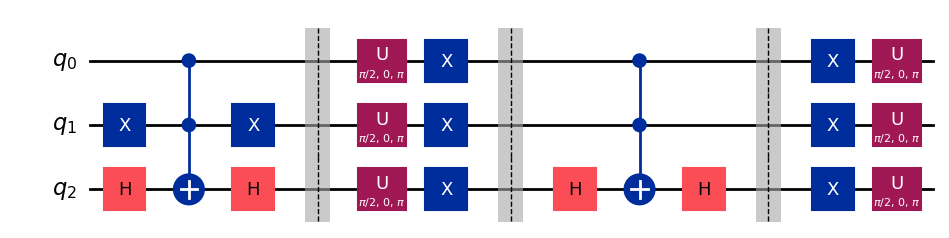

In [25]:
### Task 1
def grover_iteration(marked_state):
    """
    Construct one Grover iteration (oracle + diffusion).

    Args:
        marked_state (str): The marked state as a bitstring (e.g. '101').

    Returns:
        QuantumCircuit: Circuit implementing one Grover iteration.
    """
    ### YOUR CODE HERE
    n_qubits = len(marked_state)
    qc = QuantumCircuit(n_qubits, name="GroverIter")

    # Step 1: Oracle R_f
    qc.append(reflection_operator(marked_state), range(n_qubits))
    qc.barrier()

    # Step 2: Diffusion operator D = H -> phase flip on |000..0> -> H
    qc.h(range(n_qubits))
    qc.append(phase_flip_zero(n_qubits), range(n_qubits))
    qc.h(range(n_qubits))

    return qc

print(grover_iteration("101").draw())

(grover_iteration("101").decompose().draw("mpl"))

In [26]:
### Task 2
def grover_algorithm(marked_state, n_qubits = 3, iterations = None):
    """
    Construct the full Grover's algorithm circuit.

    Args:
        marked_state (str): The marked state as a bitstring (e.g. '101').
        n_qubits (int): Number of qubits in the system (default=3).
        iterations (int): Number of Grover iterations. If None, chooses optimal ~sqrt(N).

    Returns:
        QuantumCircuit: Full Grover circuit including measurement.
    """
    N = 2 ** n_qubits
    if iterations is None:
        iterations = int(np.round(np.pi/4 * np.sqrt(N)))

    qc = QuantumCircuit(n_qubits, n_qubits)

    # Step 1: Create uniform superposition
    qc.h(range(n_qubits))

    # Step 2: Apply Grover iterations
    for _ in range(iterations):
        qc.append(grover_iteration(marked_state), range(n_qubits))

    # Step 3: Measure
    qc.measure(range(n_qubits), range(n_qubits))

    return qc
qc=grover_algorithm("101",3,5)
qc.decompose().draw()

┌────────────┐┌───────────────┐ ░ ┌───┐┌───────────────┐┌───┐»
q_0: ┤ U(π/2,0,π) ├┤0              ├─░─┤ H ├┤0              ├┤ H ├»
     ├────────────┤│               │ ░ ├───┤│               │├───┤»
q_1: ┤ U(π/2,0,π) ├┤1 circuit-1002 ├─░─┤ H ├┤1 circuit-1005 ├┤ H ├»
     ├────────────┤│               │ ░ ├───┤│               │├───┤»
q_2: ┤ U(π/2,0,π) ├┤2              ├─░─┤ H ├┤2              ├┤ H ├»
     └────────────┘└───────────────┘ ░ └───┘└───────────────┘└───┘»
c: 3/═════════════════════════════════════════════════════════════»
                                                                  »
«     ┌───────────────┐ ░ ┌───┐┌───────────────┐┌───┐┌───────────────┐ ░ ┌───┐»
«q_0: ┤0              ├─░─┤ H ├┤0              ├┤ H ├┤0              ├─░─┤ H ├»
«     │               │ ░ ├───┤│               │├───┤│               │ ░ ├───┤»
«q_1: ┤1 circuit-1011 ├─░─┤ H ├┤1 circuit-1014 ├┤ H ├┤1 circuit-1020 ├─░─┤ H ├»
«     │               │ ░ ├───┤│               │├───┤│               │ ░ ├───┤»
«q_2: ┤2              ├─░─┤ H ├┤2              ├┤ H ├┤2              ├─░─┤ H ├»
«     └───────────────┘ ░ └───┘└───────────────┘└───┘└───────────────┘ ░ └───┘»
«c: 3/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«     ┌───────────────┐┌───┐┌───────────────┐ ░ ┌───┐┌───────────────┐┌───┐»
«q_0: ┤0              ├┤ H ├┤0              ├─░─┤ H ├┤0              ├┤ H ├»
«     │               │├───┤│               │ ░ ├───┤│               │├───┤»
«q_1: ┤1 circuit-1023 ├┤ H ├┤1 circuit-1029 ├─░─┤ H ├┤1 circuit-1032 ├┤ H ├»
«     │               │├───┤│               │ ░ ├───┤│               │├───┤»
«q_2: ┤2              ├┤ H ├┤2              ├─░─┤ H ├┤2              ├┤ H ├»
«     └───────────────┘└───┘└───────────────┘ ░ └───┘└───────────────┘└───┘»
«c: 3/═════════════════════════════════════════════════════════════════════»
«                                                                          »
«     ┌───────────────┐ ░ ┌───┐┌───────────────┐┌───┐┌─┐      
«q_0: ┤0              ├─░─┤ H ├┤0              ├┤ H ├┤M├──────
«     │               │ ░ ├───┤│               │├───┤└╥┘┌─┐   
«q_1: ┤1 circuit-1038 ├─░─┤ H ├┤1 circuit-1041 ├┤ H ├─╫─┤M├───
«     │               │ ░ ├───┤│               │├───┤ ║ └╥┘┌─┐
«q_2: ┤2              ├─░─┤ H ├┤2              ├┤ H ├─╫──╫─┤M├
«     └───────────────┘ ░ └───┘└───────────────┘└───┘ ║  ║ └╥┘
«c: 3/════════════════════════════════════════════════╩══╩══╩═
«                                                     0  1  2

In [27]:


def test_full_grover(marked_state="101", shots=1024):
    """
    Run full Grover's algorithm for a given marked state
    and print measurement results.

    Args:
        marked_state (str): The bitstring state to mark (default "101").
        shots (int): Number of measurement shots (default=1024).

    Returns:
        dict: Measurement outcome counts from the simulator.
    """
    backend = AerSimulator()
    qc = grover_algorithm(marked_state, n_qubits=3)

    # Transpile for the backend
    tqc = transpile(qc, backend)
    job = backend.run(tqc, shots=shots)
    counts = job.result().get_counts()

    print(f"\nMeasurement counts (marked={marked_state}):")
    print(counts)
    return counts


test_full_grover("000")



Measurement counts (marked=000):
{'000': 964, '011': 11, '010': 10, '100': 8, '101': 9, '111': 10, '110': 6, '001': 6}


{'000': 964,
 '011': 11,
 '010': 10,
 '100': 8,
 '101': 9,
 '111': 10,
 '110': 6,
 '001': 6}

In [28]:
from qiskit import transpile, QuantumCircuit

from qiskit.quantum_info import Statevector
import numpy as np
from collections import Counter

def _strip_measurements(circ: QuantumCircuit) -> QuantumCircuit:
    """Return a copy of circ with all Measure instructions removed."""
    new = QuantumCircuit(circ.num_qubits)
    for instr, qargs, cargs in circ.data:
        if instr.name == "measure":
            continue
        # convert qargs (Qubit objects) -> indices
        qinds = [q.index for q in qargs]
        # convert cargs to indices if needed (we skip classical ops anyway)
        new.append(instr, qinds, [])
    return new

def run_grover_test(grover_fn,
                    marked_state="101",
                    n_qubits=3,
                    shots=2000,
                    meas_threshold=0.5,
                    rel_margin=0.20,
                    verbose=True):
    """
    Run an enhanced Grover test.

    Args:
        grover_fn: function(marked_state, n_qubits) -> QuantumCircuit
        marked_state:  bitstring to be marked (e.g. "101")
        n_qubits:      number of qubits (3 for your case)
        shots:         number of measurement shots
        meas_threshold: absolute threshold for measured success fraction to pass
        rel_margin:    measured success must exceed next-best by at least this margin
        verbose:       print details

    Returns:
        dict with test results, counts, measured_prob, ideal_prob, and verdicts
    """
    qc = grover_fn(marked_state, n_qubits=n_qubits)

    backend = AerSimulator()
    tqc = transpile(qc, backend)
    job = backend.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # counts keys are strings like '101'. If not present, probability is 0.
    measured_freq = counts.get(marked_state, 0)
    measured_prob = measured_freq / shots

    # find top two outcomes
    most_common = Counter(counts).most_common()
    top_outcome, top_count = (None, 0) if not most_common else most_common[0]
    second_count = most_common[1][1] if len(most_common) > 1 else 0
    top_prob = top_count / shots
    second_prob = second_count / shots


    try:
        qc_nm = _strip_measurements(qc)
        sv = Statevector.from_instruction(qc_nm)
        idx = int(marked_state, 2)
        ideal_amp = sv.data[idx]
        ideal_prob = float(np.abs(ideal_amp)**2)
    except Exception as e:
        ideal_prob = None
        if verbose:
            print("Warning: could not compute exact statevector ideal probability:", e)

    checks = {}

    checks["meas_above_threshold"] = measured_prob >= meas_threshold

    checks["meas_above_next_by_margin"] = (top_outcome == marked_state and
                                           (top_prob - second_prob) >= rel_margin)

  
    if ideal_prob is None:
        checks["meas_close_to_ideal"] = None
    else:

        stderr = 3.0 * np.sqrt(max(ideal_prob*(1-ideal_prob), 1e-12) / max(shots,1))
        checks["meas_close_to_ideal"] = abs(measured_prob - ideal_prob) <= max(stderr, 0.05)

   
    checks["marked_is_top"] = (top_outcome == marked_state)

    
    checks["counts_sum_ok"] = sum(counts.values()) == shots


    if checks.get("meas_close_to_ideal") is None:
        verdict = checks["marked_is_top"] and checks["meas_above_threshold"]
    else:
        verdict = checks["marked_is_top"] and (checks["meas_above_threshold"] or checks["meas_close_to_ideal"])

    summary = {
        "marked_state": marked_state,
        "n_qubits": n_qubits,
        "shots": shots,
        "counts": counts,
        "measured_prob": measured_prob,
        "ideal_prob": ideal_prob,
        "top_outcome": top_outcome,
        "top_prob": top_prob,
        "second_prob": second_prob,
        "checks": checks,
        "verdict": bool(verdict)
    }

    if verbose:
        print(f"\nGrover test for marked_state = {marked_state}, n_qubits = {n_qubits}")
        print(f"Shots: {shots}")
        print("Counts (top 6):", most_common[:6])
        print(f"Measured prob (marked={marked_state}): {measured_prob:.4f}")
        if ideal_prob is not None:
            print(f"Ideal prob from statevector: {ideal_prob:.4f}")
        print(f"Top outcome: {top_outcome} (p={top_prob:.3f}), 2nd: p={second_prob:.3f}")
        print("\nChecks:")
        for k,v in checks.items():
            print(f"  {k}: {v}")
        print("\nFinal verdict (pass if True):", summary["verdict"])

        if not summary["verdict"]:
            print("\nSuggested debugging tips:")
            print("- Check bit-ordering/endianness between statevector labels and measured bitstrings.")
            print("- Verify grover_algorithm builds the correct number of iterations for n_qubits.")
            print("- For low shots increase `shots` for better statistics or inspect exact statevector (ideal_prob).")

    return summary
run_grover_test(grover_algorithm)


Grover test for marked_state = 101, n_qubits = 3
Shots: 2000
Counts (top 6): [('101', 1879), ('111', 21), ('100', 19), ('000', 18), ('011', 18), ('110', 16)]
Measured prob (marked=101): 0.9395
Top outcome: 101 (p=0.940), 2nd: p=0.011

Checks:
  meas_above_threshold: True
  meas_above_next_by_margin: True
  meas_close_to_ideal: None
  marked_is_top: True
  counts_sum_ok: True

Final verdict (pass if True): True


C:\Users\viren\AppData\Local\Temp\ipykernel_17656\653449553.py:10: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 3.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  for instr, qargs, cargs in circ.data:


{'marked_state': '101',
 'n_qubits': 3,
 'shots': 2000,
 'counts': {'101': 1879,
  '100': 19,
  '001': 15,
  '111': 21,
  '000': 18,
  '010': 14,
  '110': 16,
  '011': 18},
 'measured_prob': 0.9395,
 'ideal_prob': None,
 'top_outcome': '101',
 'top_prob': 0.9395,
 'second_prob': 0.0105,
 'checks': {'meas_above_threshold': True,
  'meas_above_next_by_margin': True,
  'meas_close_to_ideal': None,
  'marked_is_top': True,
  'counts_sum_ok': True},
 'verdict': True}

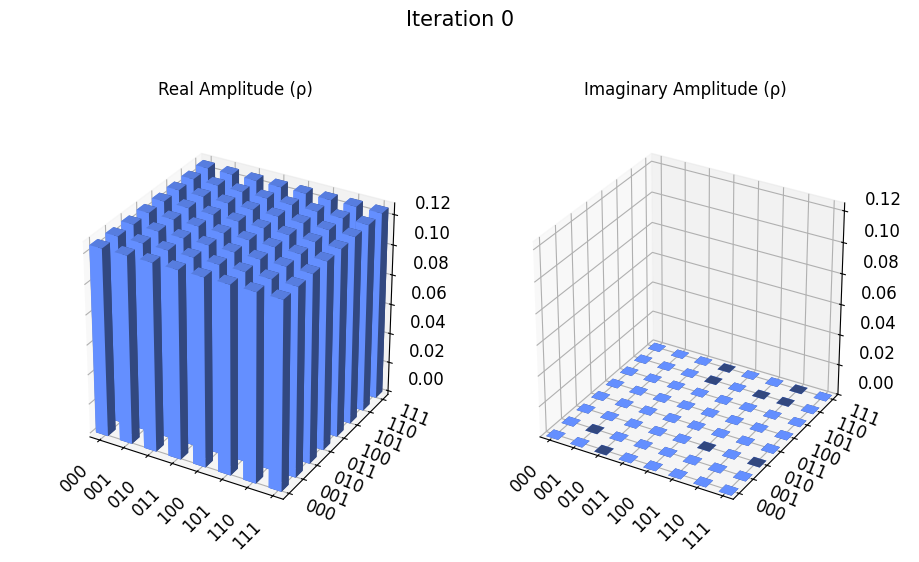

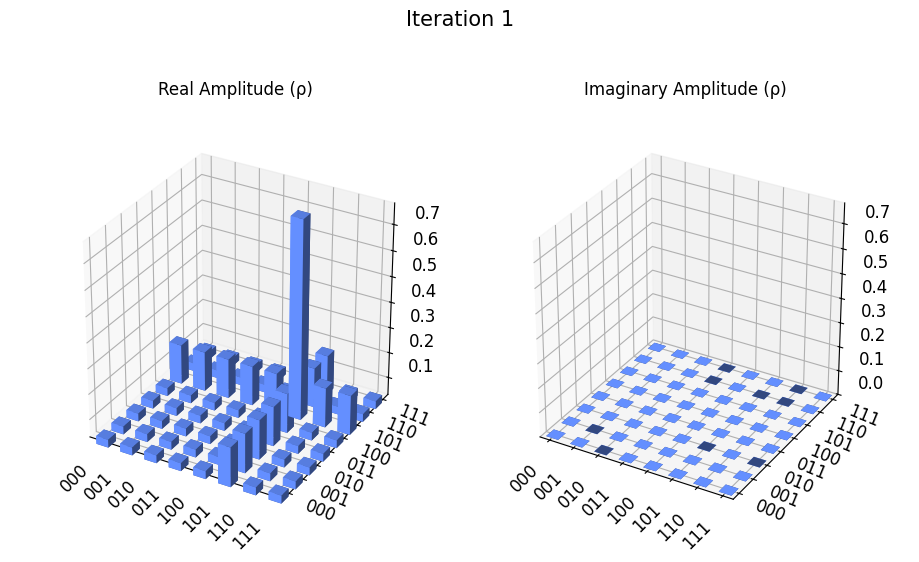

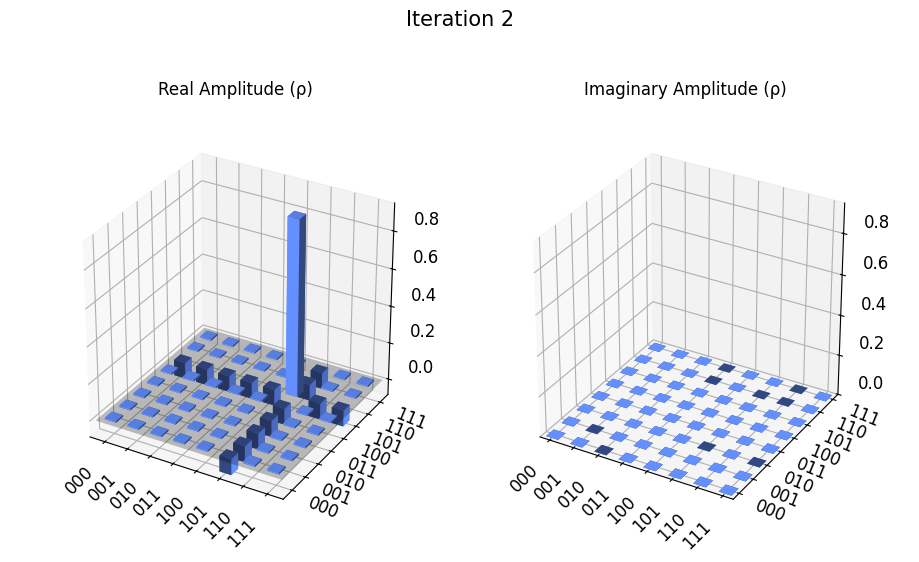

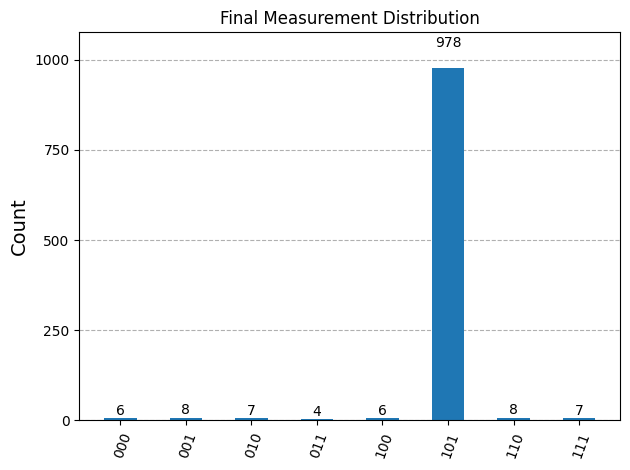

{'001': 8,
 '101': 978,
 '110': 8,
 '000': 6,
 '010': 7,
 '111': 7,
 '100': 6,
 '011': 4}

In [29]:
from qiskit.visualization import plot_state_city, plot_histogram
from IPython.display import display

### Visulaize Your Implementation
def show_grover_evolution(marked_state="101", iterations=2, shots=1024):
    """
    Visualize Grover's algorithm evolution step-by-step.

    Args:
        marked_state (str): The target state to search for (default "101").
        iterations (int): Number of Grover iterations to apply (default 3).
        shots (int): Number of measurement shots for final distribution (default 1024).

    Returns:
        dict: Measurement counts from the final simulation.
    """
    n_qubits = len(marked_state)
    sv_backend = AerSimulator(method="statevector")
    qasm_backend = AerSimulator()

    # Step 1: Initial superposition
    qc = QuantumCircuit(n_qubits)
    qc.h(range(n_qubits))  
    sv = Statevector.from_instruction(qc)
    display(plot_state_city(sv, title="Iteration 0", figsize=(9, 6)))

    # Step 2: Grover iterations
    for i in range(iterations):
        qc.append(grover_iteration(marked_state), range(n_qubits))
        sv = Statevector.from_instruction(qc)
        display(plot_state_city(sv, title=f"Iteration {i+1}", figsize=(9,6)))
        
    # Step 3: Final measurement
    qc.measure_all()
    result = qasm_backend.run(transpile(qc, qasm_backend), shots=shots).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title="Final Measurement Distribution"))

    return counts
show_grover_evolution()

# ⚔️ Final Challenge — Applying Grover’s Algorithm to Multiple Solutions

---

## Goal

Extend **Grover’s search** to the case where there are multiple marked states (e.g., two valid passwords among $N=2^n$ candidates).

---

## Background

Grover’s algorithm amplifies the amplitudes of “good” states using two reflections:

* **Oracle $R_f$**: applies a phase $-1$ to states with $f(x)=1$ (the marked states) and leaves the others unchanged.
* **Diffusion operator $D$**: 
$$
D = 2|\psi\rangle \langle \psi| - I
$$
where 
$$
|\psi\rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} |x\rangle
$$
is the uniform superposition.

With $M$ marked states, the optimal number of iterations is approximately
$$
k^\star \approx \frac{\pi}{4}\sqrt{\frac{N}{M}}
$$
(For small $N$, try $k^\star$ and $k^\star \pm 1$ to see the oscillation.)

---

## Your Task

Build a **multi-solution oracle** that flips the phase of all marked bitstrings in a list, e.g. `["101", "110"]`.

* Use the **negated-control trick**: wrap $X$ gates around controls where the marked bit is $0$, then apply a multi-controlled $Z$, then undo the $X$ gates.
* Repeat for each marked state (compose or append each per-state oracle).

Construct one **Grover iteration** for $n=3$:

* Apply your multi-solution oracle $R_f$.
* Apply the diffusion operator $D$ (Hadamards, phase flip on $|000\rangle$, Hadamards).

Run the full algorithm:

* Initialize in $|0\rangle^{\otimes n}$, apply $H^{\otimes n}$.
* Repeat the Grover iteration $k$ times (start with $k=2$ for $N=8$ and $M=2$).
* Measure and plot the histogram.

---

## What to Observe

Compare the final measurement distribution for:

* **Single solution** ($M=1$) vs. **two solutions** ($M=2$).
* **Too few iterations** ($k < k^\star$), **near optimal** ($k \approx k^\star$), and **too many** ($k > k^\star$).

### Explain why the success probability oscillates:

Grover's algorithm acts as a **rotation** in the 2D subspace spanned by the uniform superposition over unmarked states and the equal superposition over marked states. Each iteration rotates by an angle $\theta$ where $\sin(\theta/2) \approx \sqrt{M/N}$, so after $k$ iterations the success probability is approximately
$$
\sin^2\Big((2k+1)\frac{\theta}{2}\Big).
$$


Marked states: ['100', '010']
Iteration 0: total marked probability = 0.2500
Iteration 1: total marked probability = 1.0000


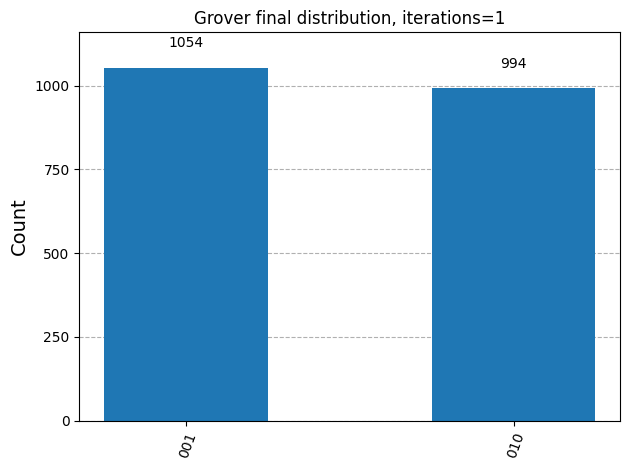

In [30]:
def multi_oracle(marked_states, n_qubits):
    """
    Oracle that flips the phase of every state listed in `marked_states`.
    Each marked state is a bitstring of length n_qubits, e.g. '101'.

    Implementation:
      For each marked string s:
        - Apply X to qubits where s has '0' (map s -> |11..1>)
        - Apply MCZ on |11..1> (H + MCX + H)
        - Undo the Xs
      The per-state circuits are concatenated (they commute only when different states are distinct;
      appending is fine because each per-state circuit flips the requested basis states).

    Args:
        marked_states: list of bitstrings (each length == n_qubits)
        n_qubits: number of qubits

    Returns:
        QuantumCircuit: n_qubit oracle that applies -1 to each marked basis state.
    """
    # Basic validation
    for s in marked_states:
        if len(s) != n_qubits or any(c not in "01" for c in s):
            raise ValueError("Each marked state must be a bitstring of length n_qubits.")

    oracle = QuantumCircuit(n_qubits, name="MultiOracle")
    for s in marked_states:
        # X-wrap where bit is '0'
        zeros = [i for i, b in enumerate(s) if b == "0"]
        if zeros:
            oracle.x(zeros)
        # Apply MCZ on |11..1> (H - MCX - H)
        if n_qubits == 1:
            oracle.z(0)
        else:
            target = n_qubits - 1
            oracle.h(target)
            oracle.mcx(list(range(target)), target)
            oracle.h(target)
        # undo X wrappers
        if zeros:
            oracle.x(zeros)
    return oracle


def grover_iteration_multi(marked_states, n_qubits):
    """
    One Grover iteration: apply multi_oracle then diffuser.
    """
    iter_circ = QuantumCircuit(n_qubits, name="GroverIter")
    iter_circ.compose(multi_oracle(marked_states, n_qubits), inplace=True)
    iter_circ.compose(diffusion_operator(n_qubits), inplace=True)
    return iter_circ

def run_grover_multi(marked_states, n_qubits, iterations,shots= 1024, show_plots= True):
    """
    Run the full Grover algorithm with multiple marked states.

    Args:
        marked_states: list of marked bitstrings (e.g., ['101', '110'])
        n_qubits: number of qubits (default 3)
        iterations: number of Grover iterations; if None, use round(pi/4 * sqrt(N/M))
        shots: measurement shots for final histogram
        show_plots: if True, display histogram and print probabilities per iteration

    Returns:
        counts: measurement result counts (dict)
        probs_by_iter: list of marked-state probabilities after each iteration (including 0)
    """
    # Validate bitstrings
    M = len(marked_states)
    N = 2 ** n_qubits
    if iterations is None:
        k_opt = int(np.round(np.pi/4 * np.sqrt(N / max(M, 1))))
        iterations = max(1, k_opt)

    # Build circuit progressively for statevector checks
    qc = QuantumCircuit(n_qubits)
    qc.h(range(n_qubits))  # initial superposition

    probs_by_iter = []
    # initial statevector
    sv = Statevector.from_instruction(qc)
    probs_by_iter.append(_total_marked_prob(sv, marked_states))

    # apply iterations and capture probability after each
    for i in range(iterations):
        qc.append(grover_iteration_multi(marked_states, n_qubits), range(n_qubits))
        sv = Statevector.from_instruction(qc)
        probs_by_iter.append(_total_marked_prob(sv, marked_states))

    # final measurement circuit (copy qc so we don't mutate the statevector circuit)
    qc_meas = qc.copy()
    qc_meas.measure_all()
    backend = AerSimulator()
    tqc = transpile(qc_meas, backend)
    result = backend.run(tqc, shots=shots).result()
    counts = result.get_counts()

    if show_plots:
        print(f"Marked states: {marked_states}")
        for i, p in enumerate(probs_by_iter):
            print(f"Iteration {i}: total marked probability = {p:.4f}")
        display(plot_histogram(counts, title=f"Grover final distribution, iterations={iterations}"))

    return counts, probs_by_iter

# small helper
def _total_marked_prob(statevector, marked_states):
    """Sum probability mass on all marked basis states given Statevector."""
    probs = statevector.probabilities_dict()
    total = 0.0
    for s in marked_states:
######### Qiskit uses little-endian ordering → reverse string
        s_qiskit = s[::-1]
        total += probs.get(s_qiskit, 0.0)
    return total

# -------------------------
# Usage examples you can run and experiment with

# Example A: single marked state => classical Grover
# counts_1, probs_1 = run_grover_multi(["101"], n_qubits=3, iterations=2, shots=2048)

# Example B: two marked states
counts_2, probs_2 = run_grover_multi(["100", "010"], n_qubits=3, iterations=1, shots=2048)



In [36]:
def test_grover_multi_final(marked_states=["101", "110"], n_qubits=3, iterations=1, tol=1e-6):
    """
    Run multi-marked Grover algorithm for a small test and check final statevector.
    Returns True if probabilities of marked states are higher than unmarked ones.
    """
    # Initial superposition
    qc = QuantumCircuit(n_qubits)
    qc.h(range(n_qubits))

    # Apply Grover iterations
    for _ in range(iterations):
        qc.append(grover_iteration_multi(marked_states, n_qubits), range(n_qubits))

    # Compute final statevector
    sv = Statevector.from_instruction(qc)
    probs = sv.probabilities_dict()

        # Convert marked_states (MSB-first) into Qiskit's little-endian basis labels
    marked_qiskit = [s[::-1] for s in marked_states]
    # Probability of marked vs unmarked states
    prob_marked = sum(probs.get(s, 0.0) for s in marked_qiskit)
    prob_unmarked = sum(probs.get(s, 0.0) for s in probs if s not in marked_qiskit)

    print(f"Marked states: {marked_states}")
    print("Probabilities:")
    for s, p in probs.items():
        print(f"  {s}: {p:.4f}")

    print(f"Total marked prob: {prob_marked:.4f}, unmarked: {prob_unmarked:.4f}")

    # Check: marked prob > unmarked prob
    return prob_marked - prob_unmarked > tol

# Example test run
result = test_grover_multi_final(marked_states=["101"], n_qubits=3, iterations=2)
print("Test passed?" , result,"\n")

result2 = test_grover_multi_final(marked_states=["1010101","1101000"], n_qubits=7, iterations=5)
print("Test passed?", result2,"\n")


Marked states: ['101']
Probabilities:
  000: 0.0078
  001: 0.0078
  010: 0.0078
  011: 0.0078
  100: 0.0078
  101: 0.9453
  110: 0.0078
  111: 0.0078
Total marked prob: 0.9453, unmarked: 0.0547
Test passed? True 

Marked states: ['1010101', '1101000']
Probabilities:
  0000000: 0.0003
  0000001: 0.0003
  0000010: 0.0003
  0000011: 0.0003
  0000100: 0.0003
  0000101: 0.0003
  0000110: 0.0003
  0000111: 0.0003
  0001000: 0.0003
  0001001: 0.0003
  0001010: 0.0003
  0001011: 0.4818
  0001100: 0.0003
  0001101: 0.0003
  0001110: 0.0003
  0001111: 0.0003
  0010000: 0.0003
  0010001: 0.0003
  0010010: 0.0003
  0010011: 0.0003
  0010100: 0.0003
  0010101: 0.0003
  0010110: 0.0003
  0010111: 0.0003
  0011000: 0.0003
  0011001: 0.0003
  0011010: 0.0003
  0011011: 0.0003
  0011100: 0.0003
  0011101: 0.0003
  0011110: 0.0003
  0011111: 0.0003
  0100000: 0.0003
  0100001: 0.0003
  0100010: 0.0003
  0100011: 0.0003
  0100100: 0.0003
  0100101: 0.0003
  0100110: 0.0003
  0100111: 0.0003
  0101000: 0.

⚔️ Congratulations, brave adventurer! \
You have completed the Qubit Quest, mastering the power of Grover’s algorithm and unlocking the magic of quantum search!


🏆 Reward: 
- $+1 \space Quantum \space Mastery $
- $ +\infty \space Respect\space from \space Schrödinger’s\space Cat\space 😻 $

The path of qubits now lies open before you. 

##### *More quests await....*

### ⚔️ Bonus Challenge: Run on Real Hardware
Qiskit allows you to submit circuits to **real IBM quantum devices**.  

As a bonus:
- Take your Grover’s algorithm implementation and run it on a real IBM quantum processor.  
- Compare the results with the **ideal simulation** (using `AerSimulator`).  
- Observe how **noise and errors** affect the output distribution.  
- Reflect on why noise makes quantum algorithms harder to implement in practice, and how **error mitigation** might be needed.